# Data Science Job Dataset Analysis

This notebook performs comprehensive data analysis including:
- Data cleaning
- Feature preprocessing
- Exploratory Data Analysis (EDA)
- Statistical analysis

In [41]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## 1. Data Loading and Initial Inspection

In [42]:
# Load the dataset
df = pd.read_csv('data_science_job.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
df.head()

Dataset Shape: (19158, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


## 2. Data Cleaning

### 2.1 Missing Values Analysis

Missing Values Percentage:
company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
training_hours             3.998330
city_development_index     2.500261
education_level            2.401086
enrolled_university        2.014824
experience                 0.339284
relevent_experience        0.000000
city                       0.000000
enrollee_id                0.000000
target                     0.000000
dtype: float64


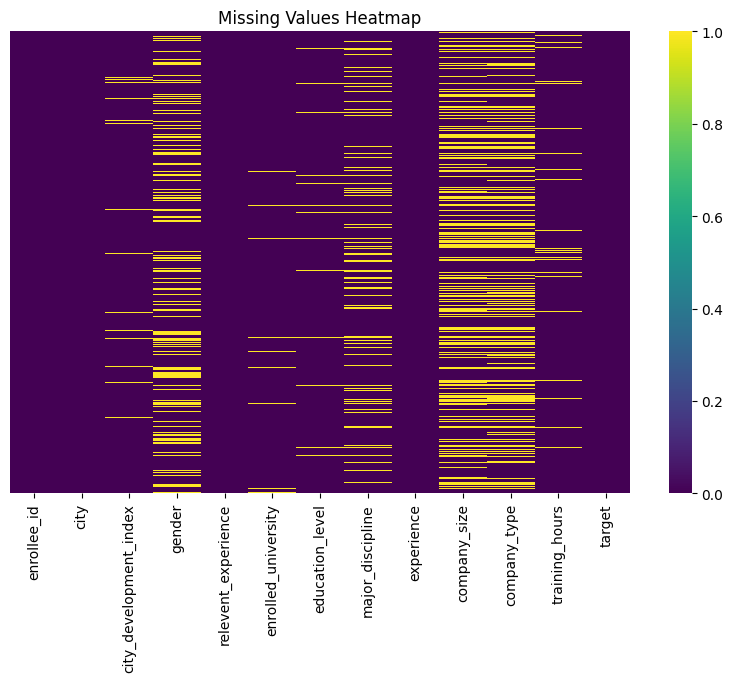

In [43]:
# Calculate missing values percentage
missing_values = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_values.sort_values(ascending=False))

# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [44]:
# Handle missing values
df = df.fillna({
    'gender': 'Other',
    'enrolled_university': 'no_enrollment',
    'education_level': 'Graduate',
    'major_discipline': 'Other',
    'company_size': 'Unknown',
    'company_type': 'Unknown'
})

# Convert experience values
df['experience'] = df['experience'].replace({'>20': 21, '<1': 0}).astype(float)

# Convert target to integer
df['target'] = df['target'].astype(int)

## 3. Feature Analysis and Engineering

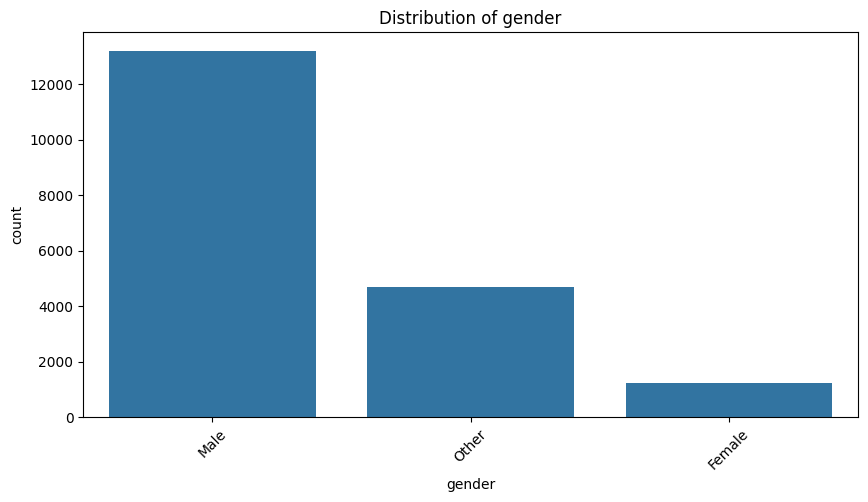


Value counts for gender:
gender
Male      69.0
Other     24.5
Female     6.5
Name: proportion, dtype: float64


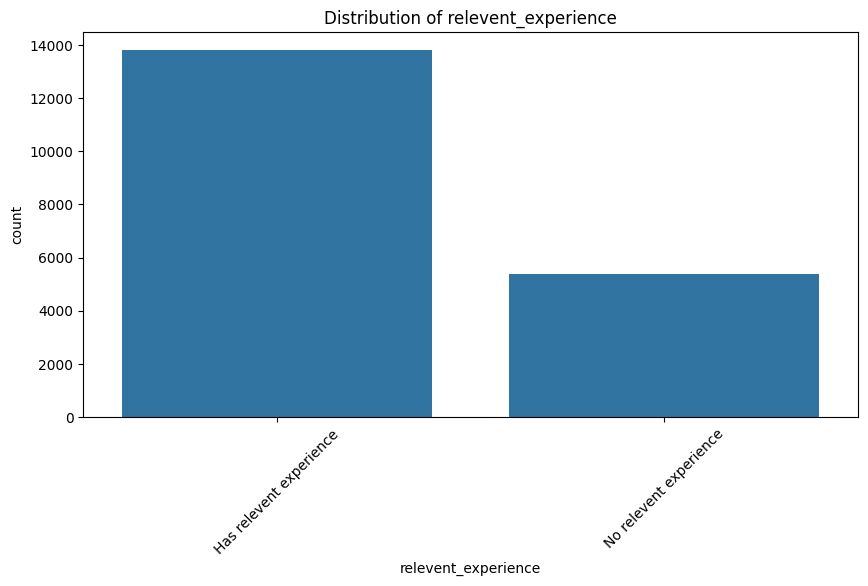


Value counts for relevent_experience:
relevent_experience
Has relevent experience    72.0
No relevent experience     28.0
Name: proportion, dtype: float64


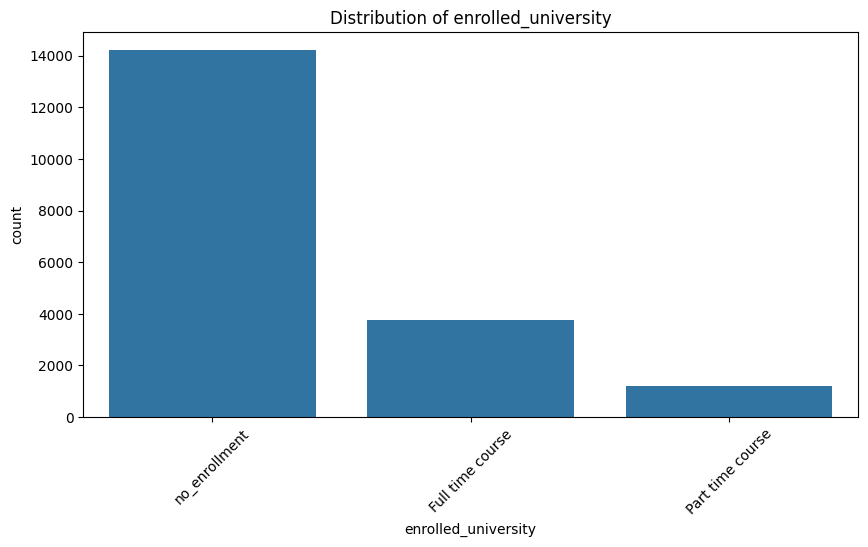


Value counts for enrolled_university:
enrolled_university
no_enrollment       74.1
Full time course    19.6
Part time course     6.3
Name: proportion, dtype: float64


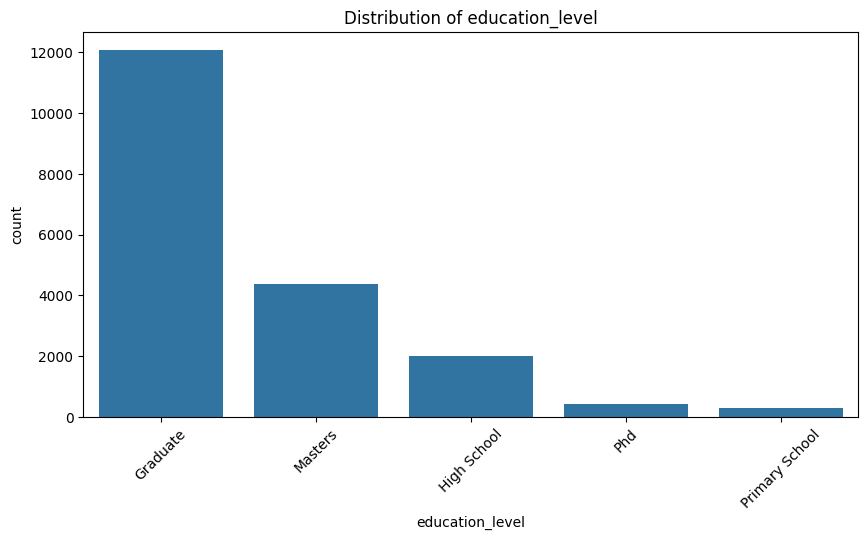


Value counts for education_level:
education_level
Graduate          62.9
Masters           22.8
High School       10.5
Phd                2.2
Primary School     1.6
Name: proportion, dtype: float64


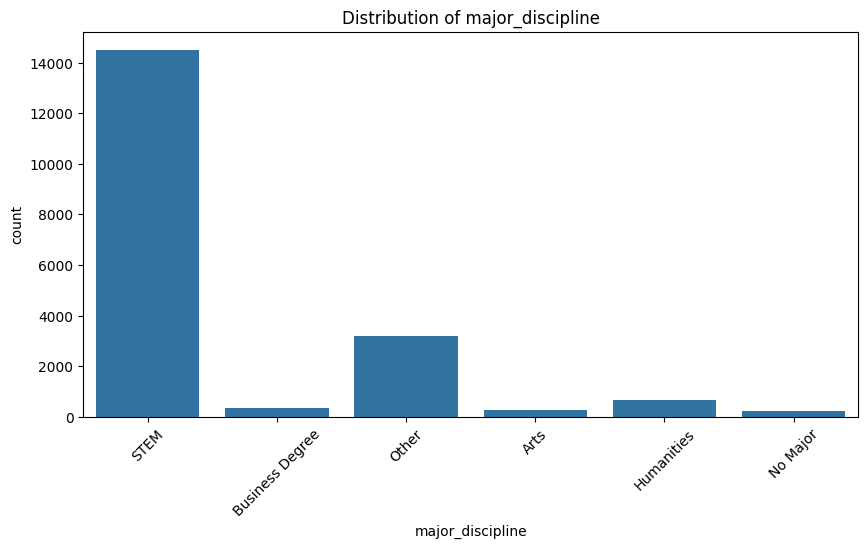


Value counts for major_discipline:
major_discipline
STEM               75.6
Other              16.7
Humanities          3.5
Business Degree     1.7
Arts                1.3
No Major            1.2
Name: proportion, dtype: float64


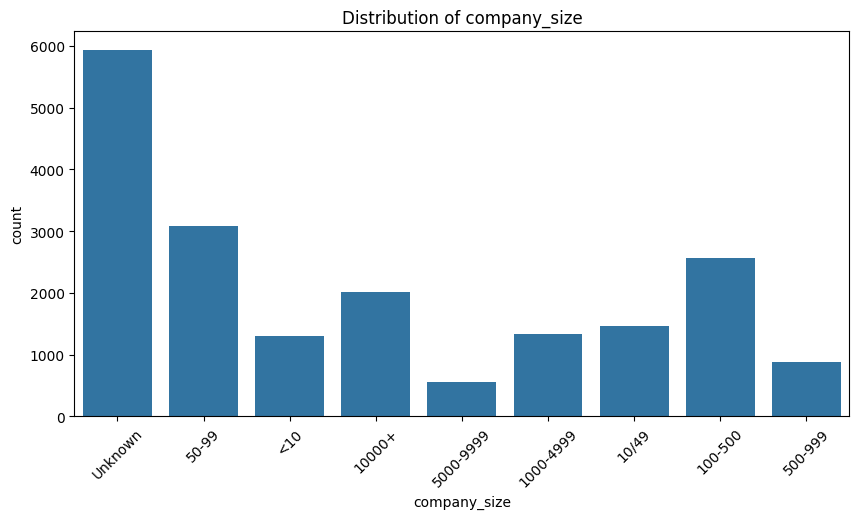


Value counts for company_size:
company_size
Unknown      31.0
50-99        16.1
100-500      13.4
10000+       10.5
10/49         7.7
1000-4999     6.9
<10           6.8
500-999       4.6
5000-9999     2.9
Name: proportion, dtype: float64


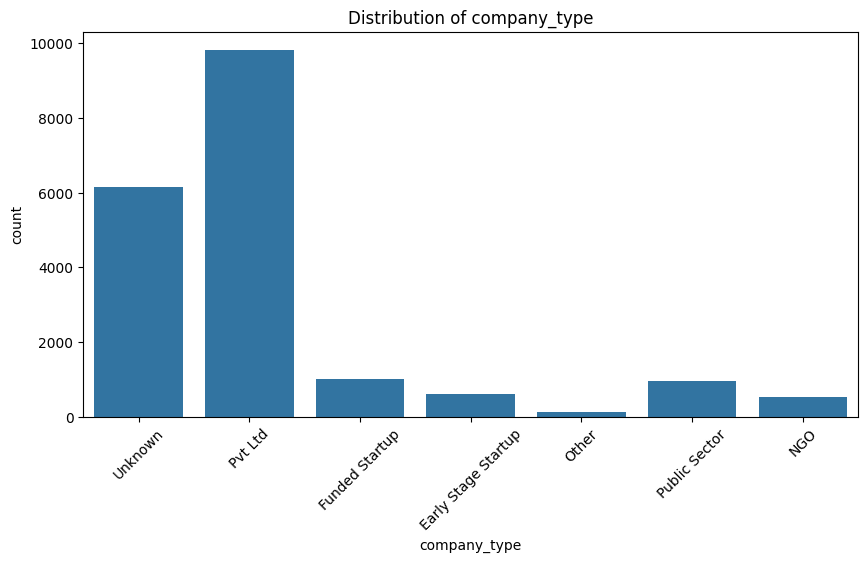


Value counts for company_type:
company_type
Pvt Ltd                51.2
Unknown                32.0
Funded Startup          5.2
Public Sector           5.0
Early Stage Startup     3.1
NGO                     2.7
Other                   0.6
Name: proportion, dtype: float64


In [45]:
# Analyze categorical variables
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                   'education_level', 'major_discipline', 'company_size', 'company_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Print value counts and percentages
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True).round(3) * 100)

## 4. Exploratory Data Analysis (EDA)

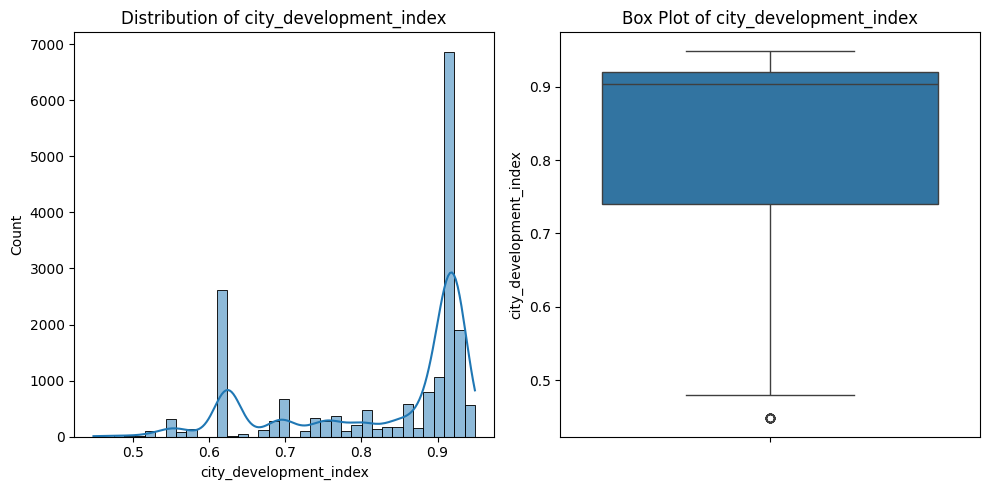

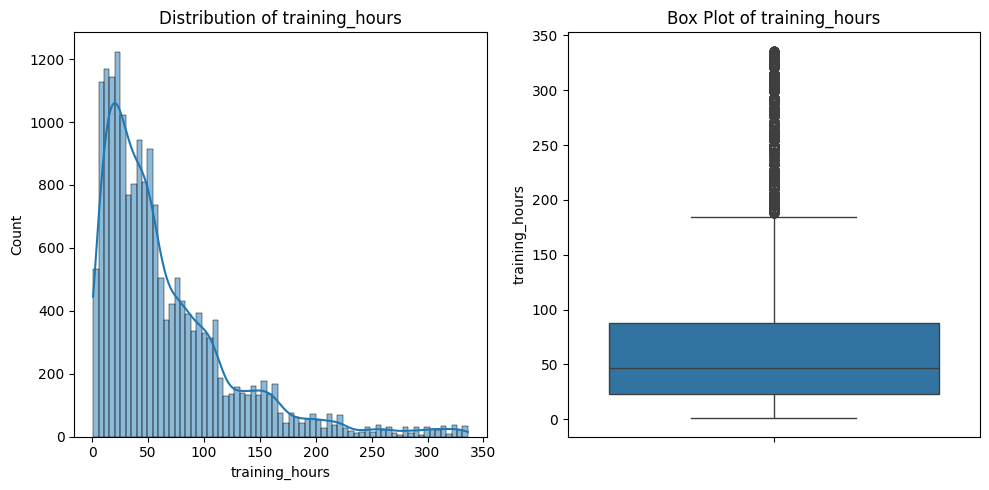

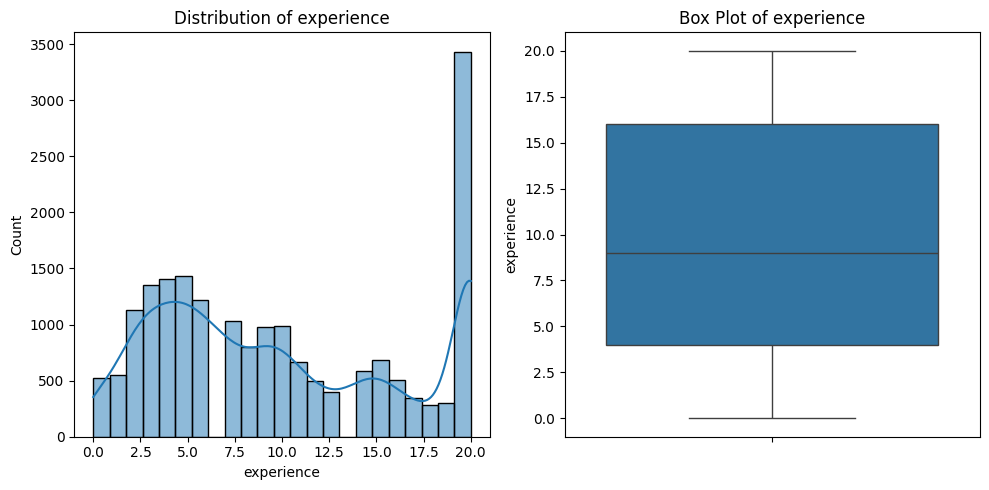

In [59]:
# Analyze numerical variables
numerical_cols = ['city_development_index', 'training_hours', 'experience']

# Distribution plots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

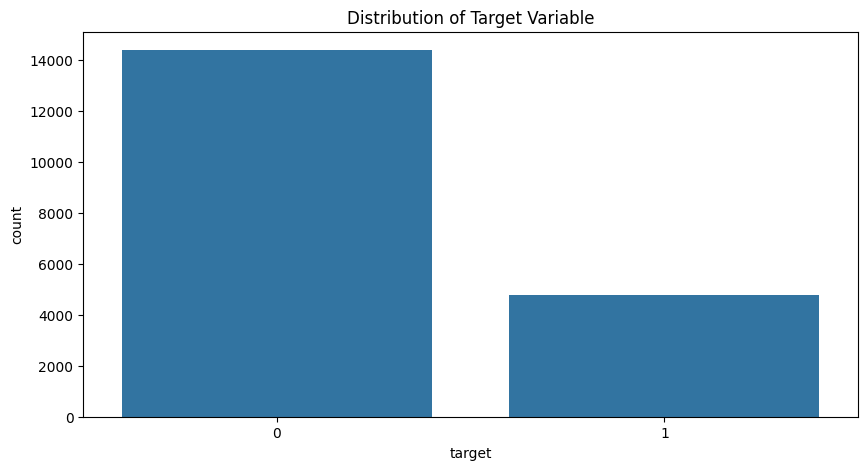


Target Distribution Percentage:
target
0    75.1
1    24.9
Name: proportion, dtype: float64


In [47]:
# Target variable analysis
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.show()

# Calculate target distribution percentage
target_dist = df['target'].value_counts(normalize=True).round(3) * 100
print("\nTarget Distribution Percentage:")
print(target_dist)

## 5. Feature Relationships Analysis

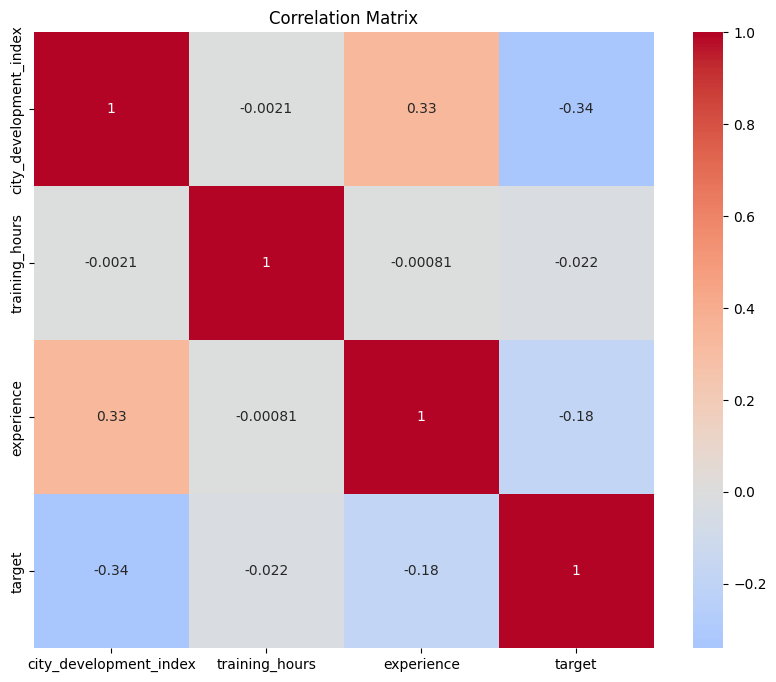

In [48]:
# Correlation analysis for numerical variables
numerical_df = df[['city_development_index', 'training_hours', 'experience', 'target']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

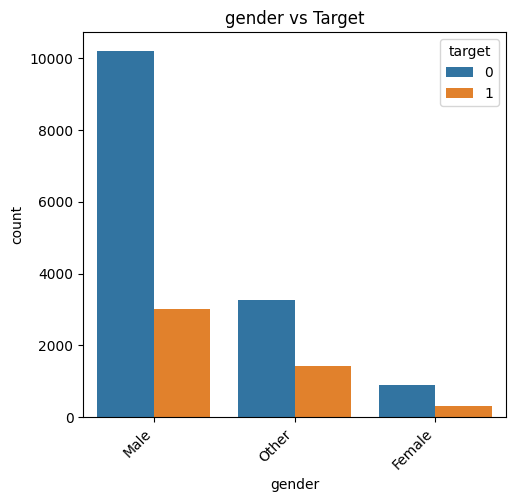

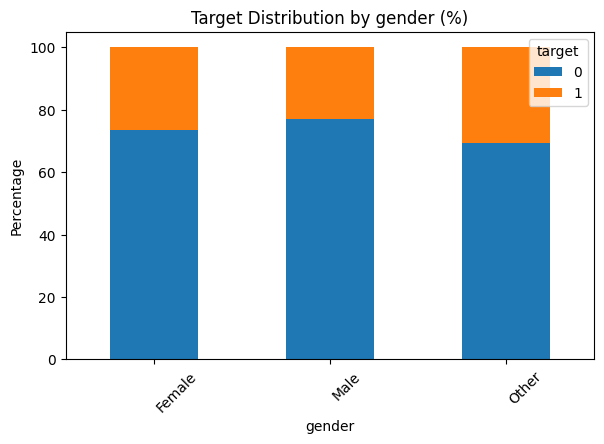

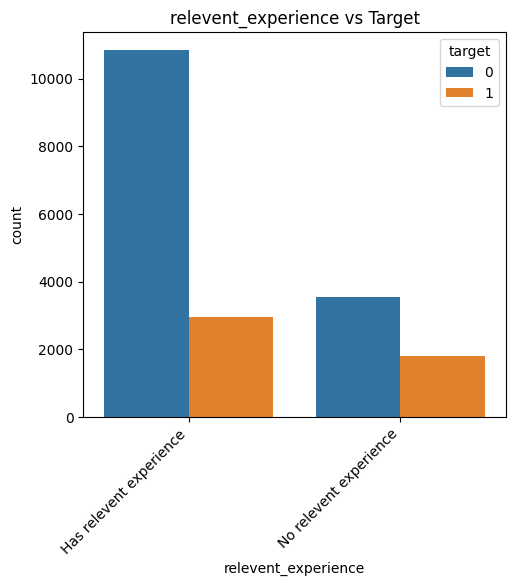

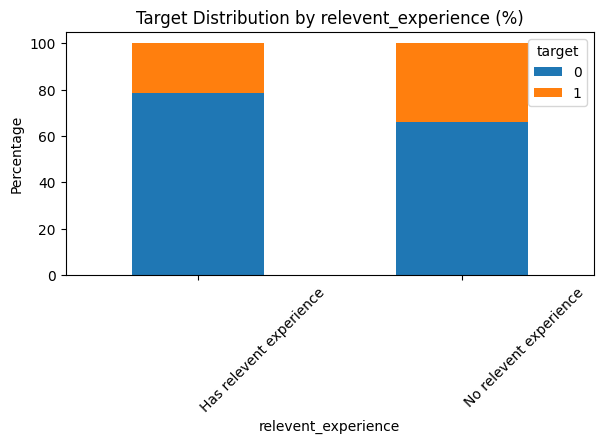

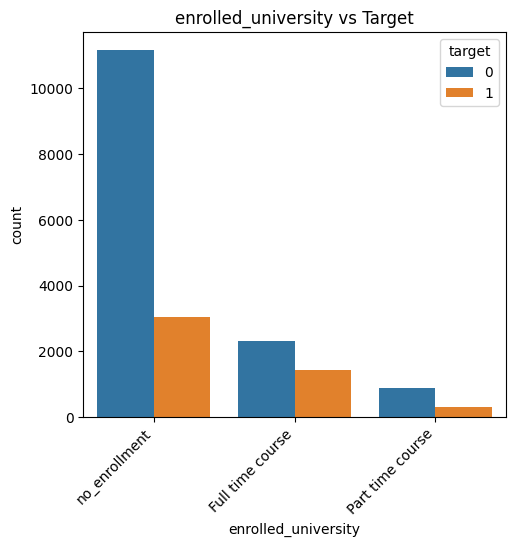

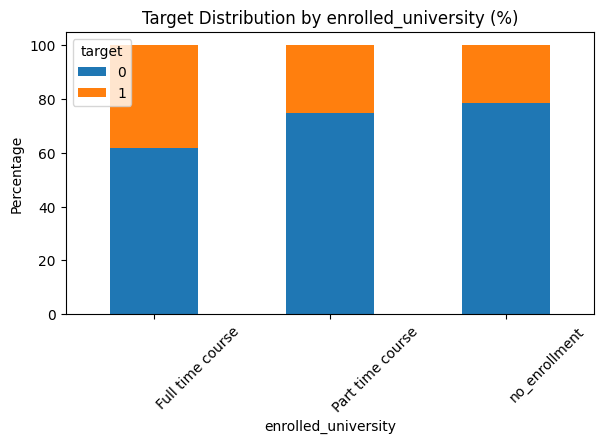

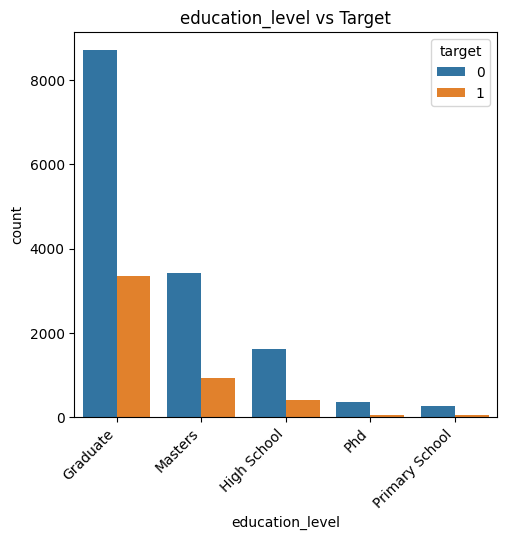

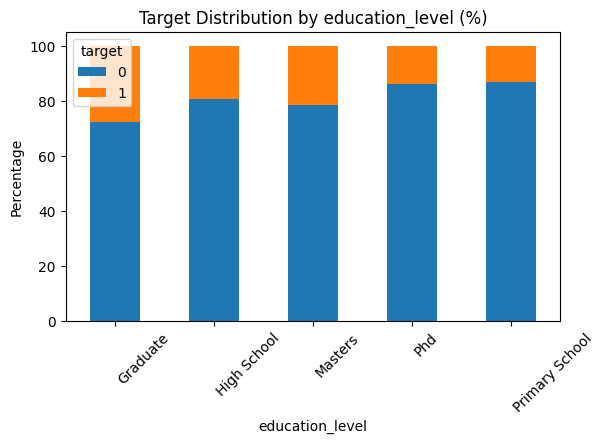

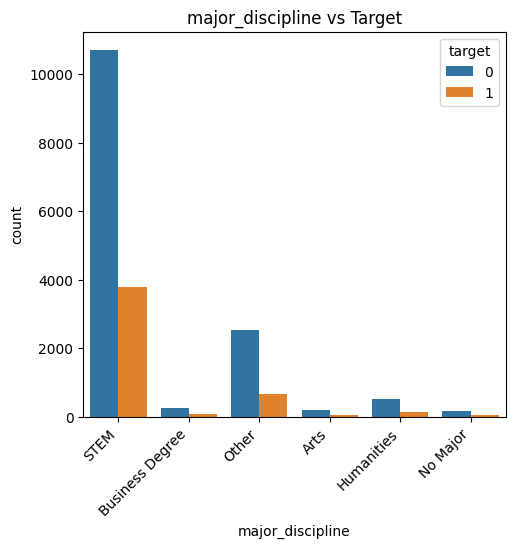

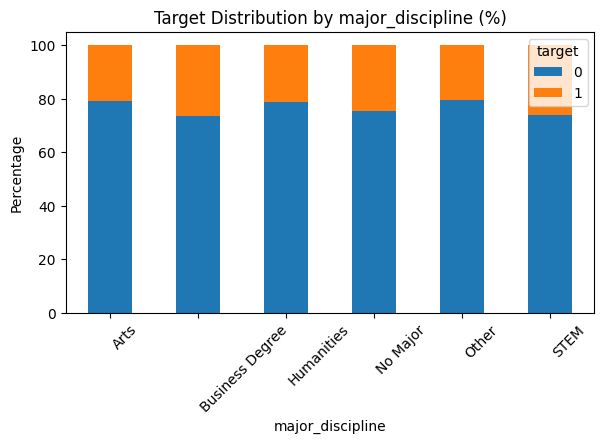

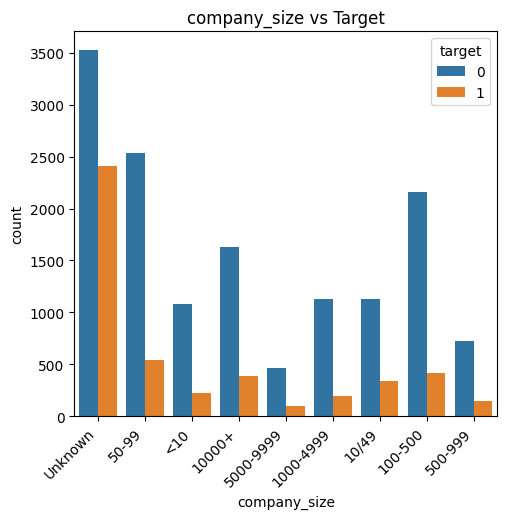

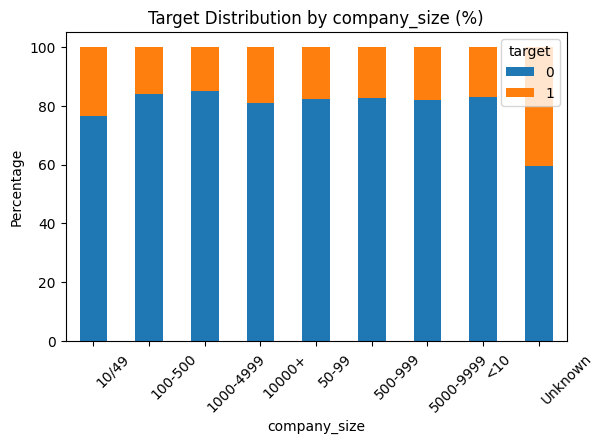

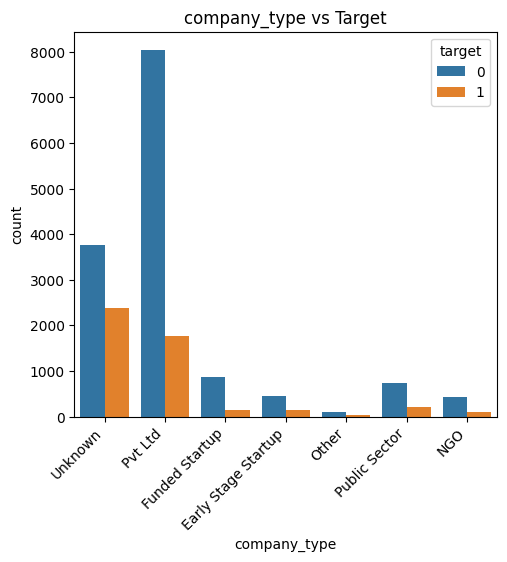

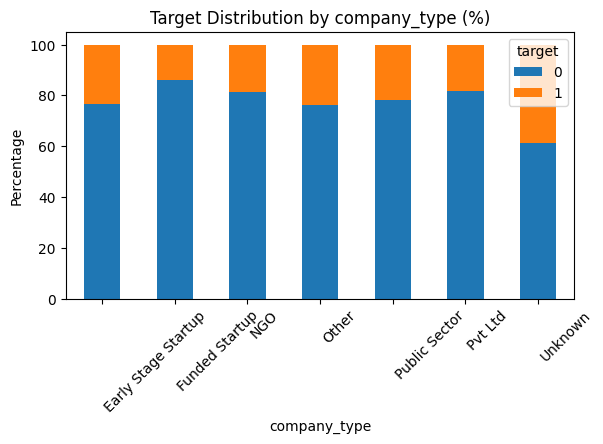

In [61]:
# Analyze target relationship with categorical variables
for col in categorical_cols:
    plt.figure(figsize=(12, 5))  
    # Count plot with target
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=col, hue='target')
    plt.xticks(rotation=45, ha='right')  
    plt.title(f'{col} vs Target')
    
    # Percentage stacked bar plot
    plt.subplot(1, 2, 2)
    percentages = pd.crosstab(df[col], df['target'], normalize='index') * 100
    percentages.plot(kind='bar', stacked=True)
    plt.title(f'Target Distribution by {col} (%)')
    plt.xticks(rotation=45, ha='left')
    plt.ylabel('Percentage')
    
    plt.tight_layout(pad=2) 
    plt.show()

## 6. Statistical Tests

In [62]:
# Chi-square tests for categorical variables
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
    print(f"Chi-square test for {col}:")
    print(f"Chi2 value: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}\n")

Chi-square test for gender:
Chi2 value: 115.28
p-value: 0.0000

Chi-square test for relevent_experience:
Chi2 value: 315.34
p-value: 0.0000

Chi-square test for enrolled_university:
Chi2 value: 440.46
p-value: 0.0000

Chi-square test for education_level:
Chi2 value: 160.45
p-value: 0.0000

Chi-square test for major_discipline:
Chi2 value: 54.78
p-value: 0.0000

Chi-square test for company_size:
Chi2 value: 1161.96
p-value: 0.0000

Chi-square test for company_type:
Chi2 value: 959.83
p-value: 0.0000



## 7. Data Preprocessing for Modeling

In [63]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['city_development_index', 'training_hours', 'experience']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Save processed dataset
df_encoded.to_csv('processed_data_science_job.csv', index=False)

print("Final processed dataset shape:", df_encoded.shape)
df_encoded.head()

Final processed dataset shape: (19158, 34)


,enrollee_id,city,city_development_index,experience,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,...,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Unknown,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,8949,city_103,0.738249,1.548318,-0.487372,1,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,29725,city_40,-0.429339,0.779691,-0.303684,0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,11561,city_21,-1.661794,-0.757565,0.297479,0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True
3,33241,city_115,-0.323932,-1.526193,-0.220189,1,False,True,True,False,...,False,False,False,True,False,False,False,False,True,False
4,666,city_162,-0.502314,1.548318,-0.954943,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
